In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

pitches = pd.read_csv('/Users/JKovach/Downloads/mlb-pitch-data-20152018/pitches.csv')
pitches = pitches.drop('event_num',1)
pitches.head(10)

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,pitch_type,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,FF,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,FF,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,FF,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,FF,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,CU,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0
5,0.627,2.397,92.9,84.8,2743.856,148.110,-45.7,3.7,23.7,13.590,...,FF,0.0,2.015000e+09,2.0,2.0,0.0,6.0,0.0,0.0,0.0
6,-1.088,1.610,93.3,85.3,2848.535,147.044,-46.3,3.6,23.7,14.549,...,FF,0.0,2.015000e+09,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,-0.257,2.047,89.3,82.4,1433.743,185.948,7.3,4.8,23.8,-1.339,...,FC,0.0,2.015000e+09,1.0,0.0,1.0,2.0,0.0,0.0,0.0
8,1.470,2.350,92.1,85.0,2666.090,146.146,-45.0,4.0,23.8,13.808,...,FF,0.0,2.015000e+09,0.0,0.0,1.0,1.0,0.0,1.0,0.0
9,-1.337,1.898,89.3,82.0,1384.143,174.388,2.0,4.9,23.8,1.218,...,FF,0.0,2.015000e+09,1.0,0.0,1.0,2.0,0.0,1.0,0.0


Column Definitions - Column information from kaggle dataset (https://www.kaggle.com/pschale/mlb-pitch-data-20152018#pitches.csv), Columns with asterisks are defined by statcast definitions found at https://baseballsavant.mlb.com/csv-docs. Some definitions modified for clarity by me.

1. px: x-location as pitch crosses the plate. X=0 means right down the middle
2. pz: z-location as pitch crosses the plate. Z=0 means the ground
3. start_speed: Speed of the pitch upon release by the pitcher (as it's thrown)
4. end_speed: Speed of the pitch when it crosses the front edge of the plate
5. spin_rate: The pitch's spin rate, measure in RPM
6. spin_dir: Direction in which pitch is spinning, measured in degrees (assuming 0 is the vector directly between the center of the mound and the center of home plate).
7. *break_angle: (None, deprecated from pre-statcast system, assuming 0 is vertical, angle of vector over break) 
8. *break_length: (None, deprecated from pre-statcast system, magnitude of break vector)
9. *break_y:
10. *ax: The acceleration of the pitch, in feet per second per second, in x-dimension, determined at y=50 feet.
11. *ay: The acceleration of the pitch, in feet per second per second, in y-dimension, determined at y=50 feet.
12. *az: The acceleration of the pitch, in feet per second per second, in z-dimension, determined at y=50 feet.
13. *sz_bot: Bottom of the batter's strike zone set by the operator when the ball is halfway to the plate.
14. *sz_top: Top of the batter's strike zone set by the operator when the ball is halfway to the plate.
15. type_confidence: Confidence in pitch_type classification. Goes up to 2 for some reason.
16. *vx0: The velocity of the pitch, in feet per second, in x-dimension, determined at y=50 feet.
17. *vy0: The velocity of the pitch, in feet per second, in y-dimension, determined at y=50 feet.
18. *vz0: The velocity of the pitch, in feet per second, in z-dimension, determined at y=50 feet.
19. x
20. x0
21. y
22. y0
23. z0
24. *pfx_x: Horizontal movement in feet from the catcher's perspective.
25. *pfx_z: Vertical movement in feet from the catcher's perspective.
26. nasty
27. *zone: Zone location of the ball when it crosses the plate from the catcher's perspective. 1-9 are in zone, left to right, then high to low. 11 is up and left of the zone, 12 is up and right of the zone, 13 and 14 are same for low
28. code: Records the result of the pitch. See dataset description for list of codes and their meaning
29. type: Simplified code, S (strike) B (ball) or X (in play)
30. pitch_type: Type of pitch. See dataset description for list of pitch types
31. event_num: event number, used for finding when exactly ejections happen.
32. b_score: score for the batter's team
33. ab_id: at-bat ID. Matches up with atbats.csv
34. b_count: balls in the current count
35. s_count: strikes in the current count
36. outsnumber of outs (before pitch is thrown)
37. pitch_num: pitch number (of at-bat)
38. on_1b: True if there's a runner on first, False if empty
39. on_2b: True if there's a runner on second, False if empty
40. on_3b: I don't know (/s. True if there's a runner on third, False if empty)

In [2]:
# Feature engineering
fastballs = ['FF', 'FC', 'SI', 'FT', 'FS', 'FA']
offspeed = ['CH', 'CU', 'SL', 'SC', 'KC', 'EP', 'KN']

def fastbool(pitch):
    if pitch in fastballs:
        return 1
    elif pitch in offspeed:
        return 0
    else:
        return np.nan

# Create target variable
pitches['is_fastball'] = pitches['pitch_type'].apply(fastbool)

# Quantity of null values less than 10% nan values, drop nan
pitches = pitches.dropna(how='any')

# Statistical test for outliers
for col in list(pitches.columns.drop(['code', 'type', 'pitch_type'], 1)):
    print("For: " + col)
    q75, q25 = np.percentile(pitches[col], [75 ,25])
    iqr = q75 - q25
    for threshold in np.arange(1,5,0.5):
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        print("The score threshold is: {}".format(threshold))
        print("Number of outliers before winsorization is: {}".format(
            len((np.where((pitches[col] > max_val) 
                          | (pitches[col] < min_val))[0]))
        ))

For: px
The score threshold is: 1.0
Number of outliers before winsorization is: 101661
The score threshold is: 1.5
Number of outliers before winsorization is: 15761
The score threshold is: 2.0
Number of outliers before winsorization is: 2185
The score threshold is: 2.5
Number of outliers before winsorization is: 384
The score threshold is: 3.0
Number of outliers before winsorization is: 123
The score threshold is: 3.5
Number of outliers before winsorization is: 56
The score threshold is: 4.0
Number of outliers before winsorization is: 29
The score threshold is: 4.5
Number of outliers before winsorization is: 21
For: pz
The score threshold is: 1.0
Number of outliers before winsorization is: 158956
The score threshold is: 1.5
Number of outliers before winsorization is: 39923
The score threshold is: 2.0
Number of outliers before winsorization is: 8990
The score threshold is: 2.5
Number of outliers before winsorization is: 1889
The score threshold is: 3.0
Number of outliers before winsoriz

Number of outliers before winsorization is: 2136
The score threshold is: 3.0
Number of outliers before winsorization is: 1587
The score threshold is: 3.5
Number of outliers before winsorization is: 1372
The score threshold is: 4.0
Number of outliers before winsorization is: 1202
The score threshold is: 4.5
Number of outliers before winsorization is: 1086
For: type_confidence
The score threshold is: 1.0
Number of outliers before winsorization is: 0
The score threshold is: 1.5
Number of outliers before winsorization is: 0
The score threshold is: 2.0
Number of outliers before winsorization is: 0
The score threshold is: 2.5
Number of outliers before winsorization is: 0
The score threshold is: 3.0
Number of outliers before winsorization is: 0
The score threshold is: 3.5
Number of outliers before winsorization is: 0
The score threshold is: 4.0
Number of outliers before winsorization is: 0
The score threshold is: 4.5
Number of outliers before winsorization is: 0
For: vx0
The score threshold i

Number of outliers before winsorization is: 0
The score threshold is: 4.5
Number of outliers before winsorization is: 0
For: b_score
The score threshold is: 1.0
Number of outliers before winsorization is: 205919
The score threshold is: 1.5
Number of outliers before winsorization is: 132437
The score threshold is: 2.0
Number of outliers before winsorization is: 53062
The score threshold is: 2.5
Number of outliers before winsorization is: 31841
The score threshold is: 3.0
Number of outliers before winsorization is: 11295
The score threshold is: 3.5
Number of outliers before winsorization is: 6893
The score threshold is: 4.0
Number of outliers before winsorization is: 2594
The score threshold is: 4.5
Number of outliers before winsorization is: 1551
For: ab_id
The score threshold is: 1.0
Number of outliers before winsorization is: 0
The score threshold is: 1.5
Number of outliers before winsorization is: 0
The score threshold is: 2.0
Number of outliers before winsorization is: 0
The score t

In [3]:
from scipy.stats.mstats import winsorize

# Create dataframe for winsorized values
w_pitches = pd.DataFrame()

for col in list(pitches.columns):
    w_pitches[col] = winsorize(pitches[col], (0.05, 0.10))

# Re-check outlier distributions
for col in list(w_pitches.columns.drop(['code', 'type', 'pitch_type'], 1)):
    print("For: " + col)
    q75, q25 = np.percentile(w_pitches[col], [75 ,25])
    iqr = q75 - q25
    for threshold in np.arange(1,5,0.5):
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        print("The score threshold is: {}".format(threshold))
        print("Number of outliers before winsorization is: {}".format(
            len((np.where((w_pitches[col] > max_val) 
                          | (w_pitches[col] < min_val))[0]))
        ))
# Winsorization seems effective

For: px
The score threshold is: 1.0
Number of outliers before winsorization is: 0
The score threshold is: 1.5
Number of outliers before winsorization is: 0
The score threshold is: 2.0
Number of outliers before winsorization is: 0
The score threshold is: 2.5
Number of outliers before winsorization is: 0
The score threshold is: 3.0
Number of outliers before winsorization is: 0
The score threshold is: 3.5
Number of outliers before winsorization is: 0
The score threshold is: 4.0
Number of outliers before winsorization is: 0
The score threshold is: 4.5
Number of outliers before winsorization is: 0
For: pz
The score threshold is: 1.0
Number of outliers before winsorization is: 0
The score threshold is: 1.5
Number of outliers before winsorization is: 0
The score threshold is: 2.0
Number of outliers before winsorization is: 0
The score threshold is: 2.5
Number of outliers before winsorization is: 0
The score threshold is: 3.0
Number of outliers before winsorization is: 0
The score threshold is

The score threshold is: 1.0
Number of outliers before winsorization is: 0
The score threshold is: 1.5
Number of outliers before winsorization is: 0
The score threshold is: 2.0
Number of outliers before winsorization is: 0
The score threshold is: 2.5
Number of outliers before winsorization is: 0
The score threshold is: 3.0
Number of outliers before winsorization is: 0
The score threshold is: 3.5
Number of outliers before winsorization is: 0
The score threshold is: 4.0
Number of outliers before winsorization is: 0
The score threshold is: 4.5
Number of outliers before winsorization is: 0
For: vx0
The score threshold is: 1.0
Number of outliers before winsorization is: 0
The score threshold is: 1.5
Number of outliers before winsorization is: 0
The score threshold is: 2.0
Number of outliers before winsorization is: 0
The score threshold is: 2.5
Number of outliers before winsorization is: 0
The score threshold is: 3.0
Number of outliers before winsorization is: 0
The score threshold is: 3.5
N

Number of outliers before winsorization is: 0
For: ab_id
The score threshold is: 1.0
Number of outliers before winsorization is: 0
The score threshold is: 1.5
Number of outliers before winsorization is: 0
The score threshold is: 2.0
Number of outliers before winsorization is: 0
The score threshold is: 2.5
Number of outliers before winsorization is: 0
The score threshold is: 3.0
Number of outliers before winsorization is: 0
The score threshold is: 3.5
Number of outliers before winsorization is: 0
The score threshold is: 4.0
Number of outliers before winsorization is: 0
The score threshold is: 4.5
Number of outliers before winsorization is: 0
For: b_count
The score threshold is: 1.0
Number of outliers before winsorization is: 0
The score threshold is: 1.5
Number of outliers before winsorization is: 0
The score threshold is: 2.0
Number of outliers before winsorization is: 0
The score threshold is: 2.5
Number of outliers before winsorization is: 0
The score threshold is: 3.0
Number of outl

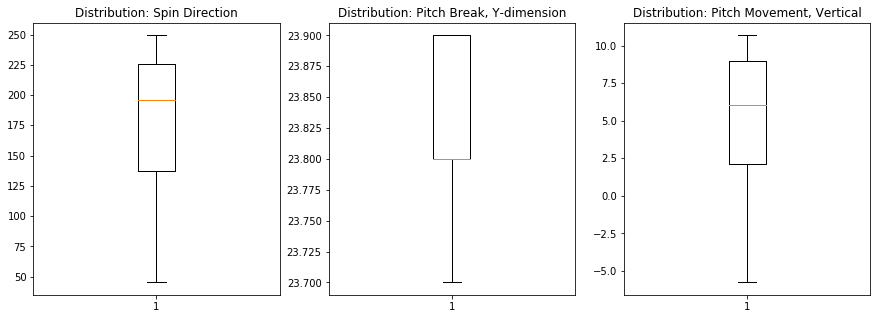

In [4]:
# Visualize variables with existing outliers
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.boxplot(w_pitches['spin_dir'])
plt.title('Distribution: Spin Direction')

plt.subplot(1,3,2)
plt.boxplot(w_pitches['break_y'])
plt.title('Distribution: Pitch Break, Y-dimension')

plt.subplot(1,3,3)
plt.boxplot(w_pitches['pfx_z'])
plt.title('Distribution: Pitch Movement, Vertical')
plt.show()

# These are fine, we expect pitches to break downward, so heavy distribution towards 90-270 values

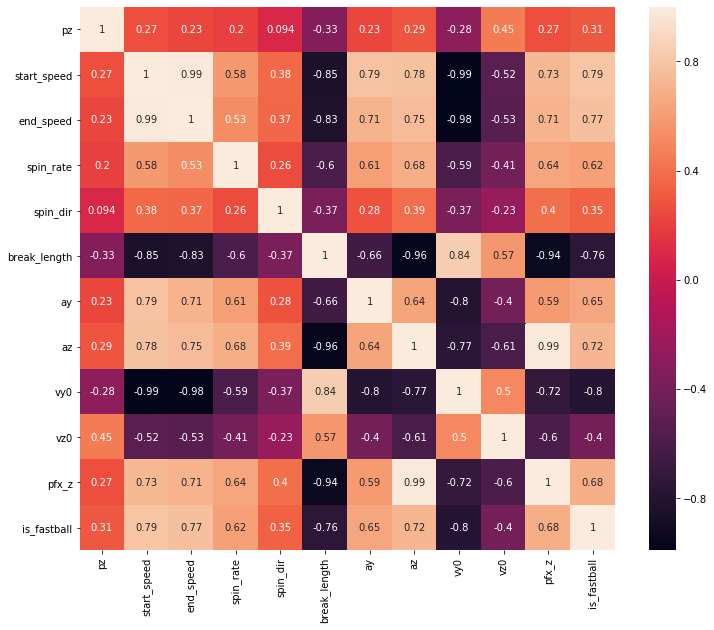

In [5]:
# Identify correlation in winsorized features
w_cor = w_pitches.corr()
cor_target = abs(w_cor['is_fastball'])
relevant_features = cor_target[cor_target>0.3]

# Create new df with only highly correlated features
redux_pitch = w_pitches[list(relevant_features.index)]

plt.figure(figsize=(12,10))
rpcor = redux_pitch.corr()
sns.heatmap(rpcor, annot=True)
plt.show()

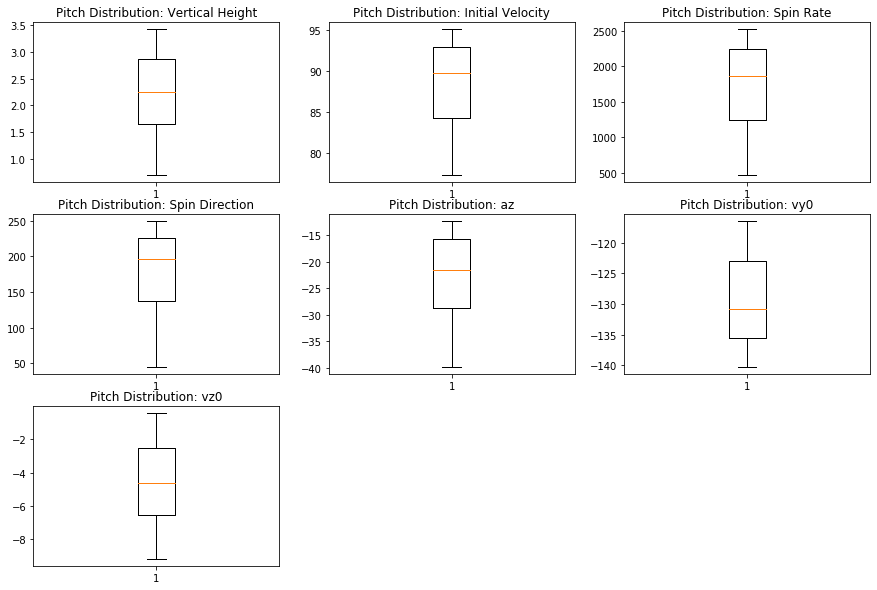

In [6]:
# Drop features which are highly correlated with each other
redux_pitch = redux_pitch.drop(['end_speed', 'break_length', 'ay', 'pfx_z'], 1)

# Check normalcy of distributions for included variables
plt.figure(figsize=(15,10))

plt.subplot(3,3,1)
plt.boxplot(redux_pitch['pz'])
plt.title('Pitch Distribution: Vertical Height')

plt.subplot(3,3,2)
plt.boxplot(redux_pitch['start_speed'])
plt.title('Pitch Distribution: Initial Velocity')

plt.subplot(3,3,3)
plt.boxplot(redux_pitch['spin_rate'])
plt.title('Pitch Distribution: Spin Rate')

plt.subplot(3,3,4)
plt.boxplot(redux_pitch['spin_dir'])
plt.title('Pitch Distribution: Spin Direction')

plt.subplot(3,3,5)
plt.boxplot(redux_pitch['az'])
plt.title('Pitch Distribution: az')

plt.subplot(3,3,6)
plt.boxplot(redux_pitch['vy0'])
plt.title('Pitch Distribution: vy0')

plt.subplot(3,3,7)
plt.boxplot(redux_pitch['vz0'])
plt.title('Pitch Distribution: vz0')
plt.show()

In [7]:
# Gaussian NB for Model #1
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

y = redux_pitch['is_fastball']
X = redux_pitch.drop(['is_fastball'],1)

gnb = GaussianNB()
gnb.fit(X, y)
y_pred = gnb.predict(X)

print('Number of mislabeled points out of {}: {}'.format(
    X.shape[0],
    (y != y_pred).sum()
))
print('Accuracy Rate: {}'.format((X.shape[0] - (y != y_pred).sum())/X.shape[0]))

# Confusion Matrix
confusion_matrix(y, y_pred)

Number of mislabeled points out of 2839561: 248565
Accuracy Rate: 0.9124635815184108


array([[ 958637,   95798],
       [ 152767, 1632359]])

In [8]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Check class imbalance
print(sorted(Counter(y).items()))

# Select random sample
rus = RandomUnderSampler(random_state=0)
X_rs, y_rs = rus.fit_resample(X,y)

X_tr, X_te, y_tr, y_te = train_test_split(X_rs, y_rs, test_size=.25, random_state=400)
print('Observations from training set {}'.format(X_tr.shape[0]))
print('Observations from test set {}'.format(X_te.shape[0]))

# Refit based on balanced training samples
gnb.fit(X_tr, y_tr)
y_te_pred = gnb.predict(X_te)

# Check model
print('Number of mislabeled points out of {}: {}'.format(
    X_te.shape[0],
    (y_te != y_te_pred).sum()
))    
print('Accuracy Rate: {}'.format((X_te.shape[0] - (y_te != y_te_pred).sum())/X_te.shape[0]))

# Confusion Matrix
print(confusion_matrix(y_te, y_te_pred))

# Check accuracy with test groups
print('Training R^2: ' + str(gnb.fit(X_tr, y_tr).score(X_tr, y_tr)))
print('Test R^2: ' + str(gnb.fit(X_te, y_te).score(X_te, y_te)))

[(0.0, 1054435), (1.0, 1785126)]
Observations from training set 1581652
Observations from test set 527218
Number of mislabeled points out of 527218: 45291
Accuracy Rate: 0.9140943594490325
[[242399  21255]
 [ 24036 239528]]
Training R^2: 0.9132021456047221
Test R^2: 0.9142290285991753


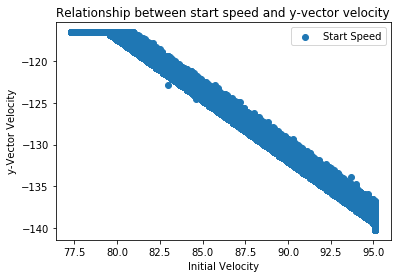

In [13]:
plt.scatter(redux_pitch['start_speed'], redux_pitch['vy0'])
plt.legend(['Start Speed', 'Y-Vector Velocity'])
plt.title('Relationship between start speed and y-vector velocity')
plt.xlabel('Initial Velocity')
plt.ylabel('y-Vector Velocity')
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Create sample dataset to limit processing time
sample_rdp = redux_pitch.sample(frac=.2, replace=True, random_state=0)

nbrs = KNeighborsClassifier(n_neighbors=100, weights='distance')
X = sample_rdp[['start_speed', 'vy0']]
y = sample_rdp['is_fastball']

Xrs, yrs = rus.fit_resample(X, y)
Xrs_train, Xrs_test, yrs_train, yrs_test = train_test_split(Xrs, yrs, test_size=0.25, random_state=400)
nbrs.fit(Xrs_train,yrs_train)

yrs_pred = nbrs.predict(Xrs_test)
print('Test Set Accuracy: {}'.format((Xrs_test.shape[0] - (yrs_test != yrs_pred).sum())/Xrs_test.shape[0]))
print('Training R^2: ' + str(gnb.fit(Xrs_train, yrs_train).score(Xrs_train, yrs_train)))
print('Test R^2: ' + str(gnb.fit(Xrs_test, yrs_test).score(Xrs_test, yrs_test)))

Test Set Accuracy: 0.8909924272618573
Training R^2: 0.8957840395784039
Test R^2: 0.8962402019396838


[0.89567922 0.84487026 0.90518664 0.90555176 0.88703008 0.82482004
 0.89051431 0.90460723 0.91044925 0.80338192]


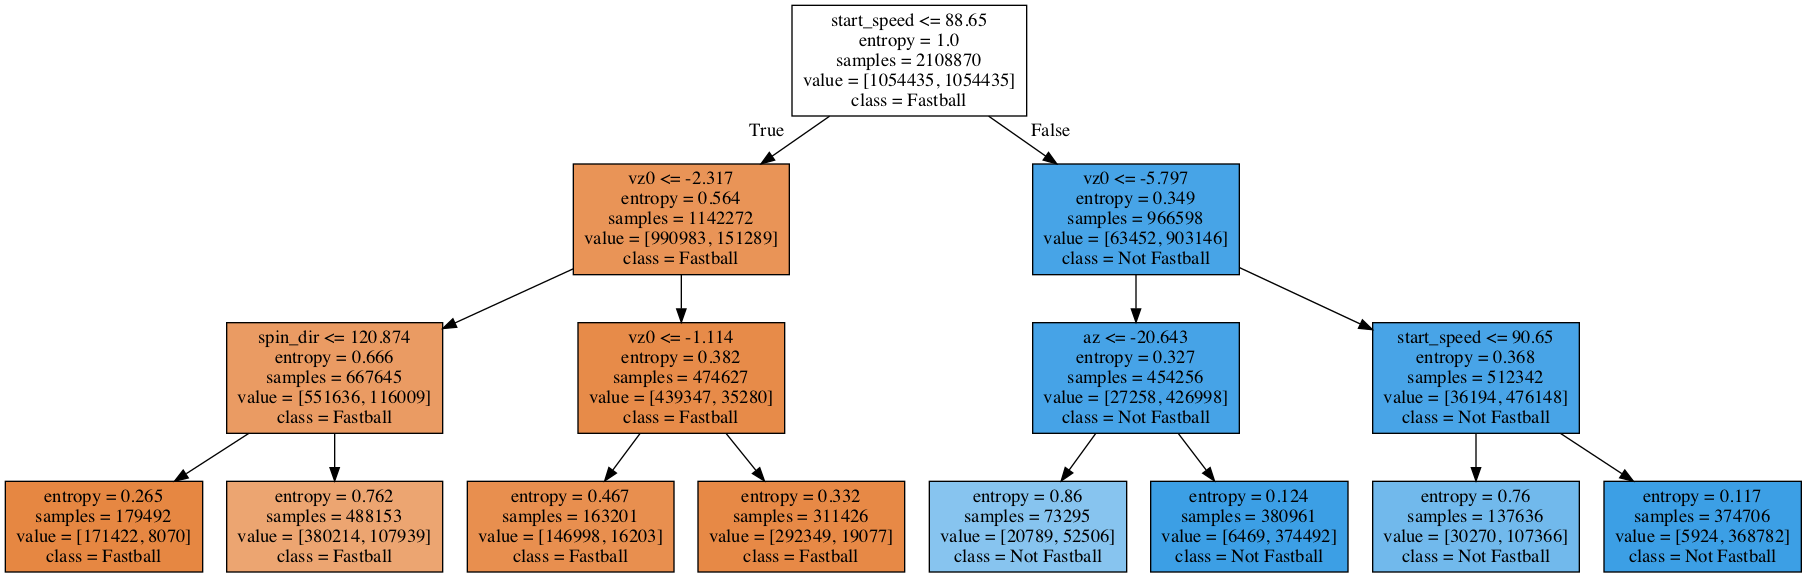

In [11]:
# Decision tree model
from sklearn import tree
from IPython.display import Image
import pydotplus, graphviz
from sklearn.model_selection import cross_val_score

# Reset features and target
X = redux_pitch.drop('is_fastball', 1)
y = redux_pitch['is_fastball']
X_rs, y_rs = rus.fit_resample(X,y)

# Using a simple decision tree to determine fastball or offspeed
pitch_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=3,
)
pitch_tree.fit(X_rs, y_rs)

dot_data = tree.export_graphviz(
    pitch_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Fastball', 'Not Fastball'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
print(cross_val_score(pitch_tree, X_rs, y_rs, cv=10))
Image(graph.create_png())
# Tree appears less accurate than simple NB

In [12]:
# Forest to predict fastball or offspeed
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X_rs, y_rs, cv=10)

/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

array([0.92235689, 0.92126152, 0.92067353, 0.92157449, 0.91734001,
       0.91289607, 0.91462686, 0.92286354, 0.92542416, 0.92087668])

These models are reasonably accurate. They give us good explanatory power to demonstrate whether a pitch will be a fastball or offspeed pitch based on it's characteristics. There are two problems however; first, not all fastballs and offspeed pitches are the same. A curveball has different characteristics than a slider and a four-seam fastball generally has no break to it, where a two-seam fastball may. Secondly, these characteristics are only apparent after the pitch is thrown. This could be useful in scouting teams and players, specifically in determining what pitches a pitcher may have a proclivity toward throwing.

Because of these problems, they don't give us much in terms of predictive power, especially in terms of information that would be useful to a hitter. In order to maximize the usefulness of the model, we need to target a new dependent variable to determine the pitch type based on the situation (count, number of runners on, outs, etc.). With this new dependent, the model's primary usefulness would allow a batter to predict the most likely type of pitch being thrown in a given situation and correctly time their swing. Additionally, knowing what type of pitch a pitcher might throw, we could create additional models which could predict the continuous variable characteristics to expect of the pitch. 